# Multi-linear regression

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/ML/linear_regression/multilinear_regression.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Data

In [2]:
fishes = pd.read_csv("https://raw.githubusercontent.com/concordia-grad-computing-seminars/data-engineering/main/DataSets/Fishes/Fish.csv")
fishes.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Exploring

In [3]:
fishes.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


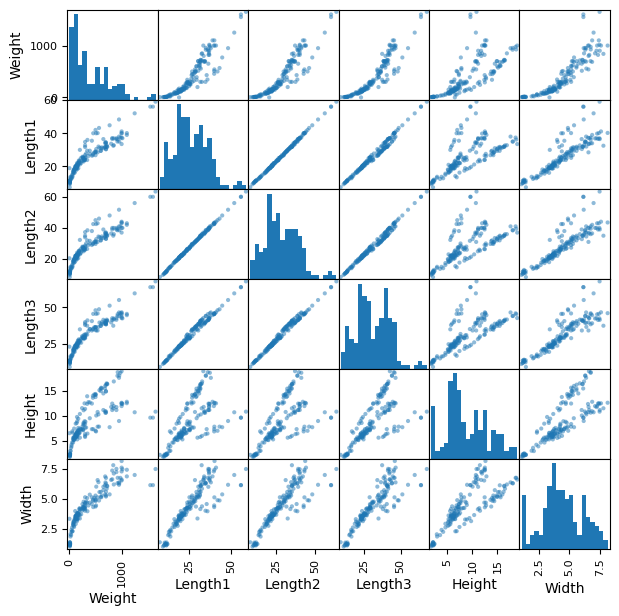

In [4]:
pd.plotting.scatter_matrix(fishes, hist_kwds={'bins':20}, figsize=(7, 7))
plt.show()

## Multi-linear regression

We will build a linear model to predict the weight of a fish, given its features `Length1`, `Length2`, `Length2`, `Height` and `Width`:

$
weight = \beta_0 + \beta_1 \cdot Length_1 + 
                   \beta_2 \cdot Length_2 +
                   \beta_3 \cdot Length_3 +
                   \beta_4 \cdot Height +
                   \beta_5 \cdot Width
$

There are the following fish species in the data-set

In [5]:
fishes.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

We expect that the correlation between the fish weight and its attributes is species dependent. Consequently we build a model for a given fish species.

In [6]:
df = fishes[fishes['Species']=='Smelt']

Building the features matrix and the target values:

In [7]:
X = np.c_[df['Length1'], df['Length2'], df['Length3'], df['Height'], df['Width']]
y = df['Weight']

Performing multi-linear regression

In [8]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

The trained features weights (the $\beta_i$, $i=1,..,5$) are:

In [9]:
reg.coef_

array([-4.80358777,  4.48999633,  0.94354294,  3.57569317,  3.51909426])

The bias term ($\beta_0$):

In [10]:
reg.intercept_

-13.189628978886583

## Errors of predictions

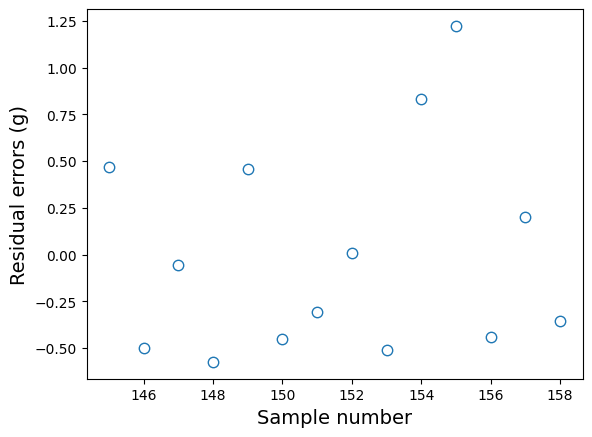

In [11]:
# residual errors
err = y - reg.predict(X)

# Plot
plt.plot(err, ".", markersize=15, markerfacecolor='white')
plt.xlabel('Sample number', fontsize=14)
plt.ylabel('Residual errors (g)', fontsize=14)
plt.show()

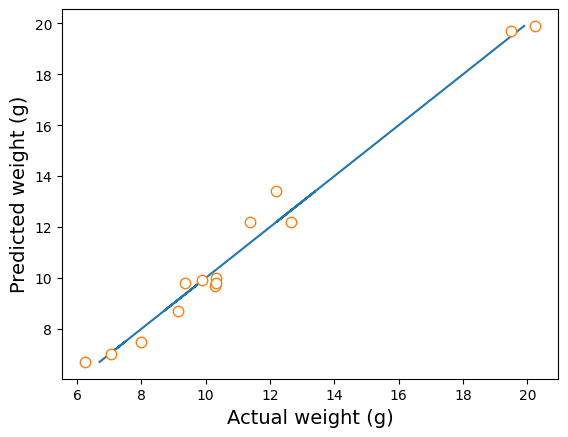

In [12]:
y_pred = reg.predict(X)
plt.plot(y, y, "-")
plt.plot(y_pred, y, ".", markersize=15, markerfacecolor='white')
plt.xlabel('Actual weight (g)', fontsize=14)
plt.ylabel('Predicted weight (g)', fontsize=14)
plt.show()

## Suggested activities

* Build models for other species too
* Build a model which doesn't take into account the species. Can you see that the species are important or not?
* Some features are strongly correlated (which ones?). Does this imply something about building a model ? (We will discuss this in more details further in the semester)